# Momentum Trading Strategy

*The following is a presentation of using Python to test a momentum trading strategy. The comments illustrate the process in the code.*

In [2]:
# Import necessay libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  

# Load csv into a Pandas DataFrame
df = pd.read_csv('3 Asset Data.csv', parse_dates = True, index_col = 0)
df1 = pd.read_csv('3 Asset Data.csv')
gld_ret = [1]
ief_ret = [1]
spy_ret = [1]

# Create daily returns for the Assets
for i in range(len(df) - 1):
    gld_ret.append(df['Adj Close GLD'][i + 1] / df['Adj Close GLD'][i] )
    ief_ret.append(df['Adj Close IEF'][i + 1] / df['Adj Close IEF'][i] )
    spy_ret.append(df['Adj Close SPY'][i + 1] / df['Adj Close SPY'][i] )
    
gld_ret = np.array(gld_ret)
ief_ret = np.array(ief_ret)
spy_ret = np.array(spy_ret)

# Create daily percent change vectors
gld_ret_pct = gld_ret - 1
ief_ret_pct = ief_ret - 1
spy_ret_pct = spy_ret - 1

df_returns = pd.DataFrame()

df_returns['GLD'] = gld_ret_pct
df_returns['IEF'] = ief_ret_pct
df_returns['SPY'] = spy_ret_pct



** Momentum Strategy **

A trading strategy that uses momentum as a signal to trade generally looks at the past returns of the asset to determine whether or not the asset is bought or sold. In this example if the asset met a threshold for returns over a previous time period a decision to buy, sell, or hold would be made. Every day the signal was monitored to make trades.

In [4]:
gold_pos = 1
bond_pos = 1
stock_pos = 1

gold_mom = []
bond_mom = []
stock_mom = []



for i in range(124,len(df)):
    if df['Adj Close GLD'][i] / df['Adj Close GLD'][i - 124] > 1:
        gold_pos *= gld_ret[i]
        gold_mom.append(gold_pos)
    else:
        gold_mom.append(gold_pos)
for i in range(124,len(df)):
    if df['Adj Close IEF'][i] / df['Adj Close IEF'][i - 124] > 1:
        bond_pos *= ief_ret[i]
        bond_mom.append(bond_pos)
    else:
        bond_mom.append(bond_pos)
for i in range(124,len(df)):
    if df['Adj Close SPY'][i] / df['Adj Close SPY'][i - 124] > 1:
        stock_pos *= spy_ret[i]
        stock_mom.append(stock_pos)
    else:
        stock_mom.append(stock_pos)
        
dates = df1['Date'][124:]
df_mom = pd.DataFrame(index = dates)
df_mom['Stock_Mom'] = np.array(stock_mom)
df_mom['Bond_Mom'] = np.array(bond_mom)
df_mom['Gold_Mom'] = np.array(gold_mom)

gold_mom_ret = [1]
bond_mom_ret = [1]
stock_mom_ret = [1]

for i in range(len(bond_mom) - 1):
    gold_mom_ret.append(gold_mom[i + 1] / gold_mom[i])
    bond_mom_ret.append(bond_mom[i + 1] / bond_mom[i])
    stock_mom_ret.append(stock_mom[i + 1] / stock_mom[i])
    


**Rebalancing**

In the block of code below an algorithm is implemented to rebalance the portfolio. The investments in each asset start out as 1/3 of the total capital. While investing in the momentum portfolio if any of the assets exceed a 40% allocation of the total portfolio the portfolio is rebalanced to the original weights.

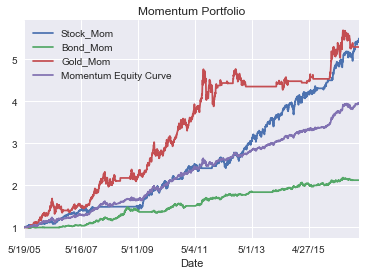

In [5]:
# Simulation of an equal weigh investment in each asset with a rebalancing rule
mom_eq_curve = []
capital = 1
gold_cap = capital / 3
bond_cap = capital / 3
stock_cap = capital / 3
for i in range(len(gold_mom)):
    if gold_cap > 0.4 * capital or bond_cap > 0.4 * capital or gold_cap > 0.4 * capital:
        gold_cap = capital / 3
        bond_cap = capital / 3
        gold_cap = capital / 3
        gold_cap *= gold_mom_ret[i]
        bond_cap *= bond_mom_ret[i]
        stock_cap *= stock_mom_ret[i]
        capital = gold_cap + bond_cap + stock_cap
        mom_eq_curve.append(capital)
    else:
        gold_cap *= gold_mom_ret[i]
        bond_cap *= bond_mom_ret[i]
        stock_cap *= stock_mom_ret[i]
        capital = gold_cap + bond_cap + stock_cap
        mom_eq_curve.append(capital)
        
df_mom['Momentum Equity Curve'] = np.array(mom_eq_curve)
plt.show()
df_mom.plot(title = "Momentum Portfolio")


**Correlations**

Below is a graphic that displays the correlations between the assets during the trading period. It is a benefit to the system to trade assets that are uncorrelated. As seen in the matrix, dark maroon signifies a high positive correlation and dark blue signifies a high negative correlation.

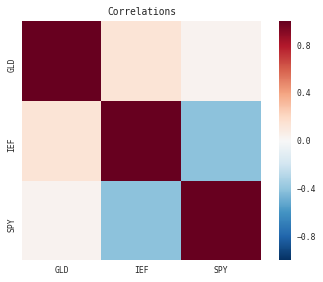

In [29]:
sns.set(context="paper", font="monospace")

cormat = df_returns.corr()
plt.title('Correlations')
sns.heatmap(cormat, vmax = 1, square = True)
plt.show()


**Risk Adjusted Returns**

The performance of the portfolio is measured by the continuously compounded annual return divided by the standard deviation of the returns. 

In [58]:
# Calculate Continuously Compounded Annual Return of the Momentum Portfolio
# r = ln(S_final/S_initial) / t
r = np.log(mom_eq_curve[-1] / mom_eq_curve[0]) / (len(mom_eq_curve) / 252)

# Calculate the Standard deviation of the Momentum Portfolio
momentum_pct_rets = [1]
for i in range(len(mom_eq_curve) - 1):
    momentum_pct_rets.append(mom_eq_curve[i + 1] / mom_eq_curve[i])

momentum_pct_rets = np.array(momentum_pct_rets) - 1

stdev = np.std(momentum_pct_rets)

# Calculate Risk Adjusted Return Metric
# r / stdev
R_adj_ret = (r) / (stdev * (252 ** 0.5))


In [61]:
print("Continuously Compounded Annual Rate of Return: " + str(r))
print("Risk Adjusted Return Metric: " + str(R_adj_ret))

Continuously Compounded Annual Rate of Return: 0.118026732271
Risk Adjusted Return Metric: 1.68303584677
